In [1]:
import zipfile
import os

from PIL import Image
import shutil

import numpy as np

In [2]:
files = [x for x in os.listdir("./EDX/") if ".docx" in x]
images = []

In [3]:
for file in files:
    zip_ref = zipfile.ZipFile("./EDX/"+file, 'r')
    zip_ref.extractall("./TMP/")
    outfiles = os.listdir("./TMP/media")
    for f in outfiles:
        i = Image.open("./TMP/media/"+f)
        images.append(np.array(i))
    zip_ref.close()
    
    shutil.rmtree("./TMP/")

In [4]:
import matplotlib.pyplot as plt
plt.show()

for idx, i in enumerate(images):
    print(idx)
    plt.imshow(i)
    plt.show()
    

0


<Figure size 640x480 with 1 Axes>

1


<Figure size 640x480 with 1 Axes>

2


<Figure size 640x480 with 1 Axes>

3


<Figure size 640x480 with 1 Axes>

4


<Figure size 640x480 with 1 Axes>

5


<Figure size 640x480 with 1 Axes>

6


<Figure size 640x480 with 1 Axes>

7


<Figure size 640x480 with 1 Axes>

8


<Figure size 640x480 with 1 Axes>

9


<Figure size 640x480 with 1 Axes>

10


<Figure size 640x480 with 1 Axes>

11


<Figure size 640x480 with 1 Axes>

12


<Figure size 640x480 with 1 Axes>

13


<Figure size 640x480 with 1 Axes>

14


<Figure size 640x480 with 1 Axes>

15


<Figure size 640x480 with 1 Axes>

16


<Figure size 640x480 with 1 Axes>

17


<Figure size 640x480 with 1 Axes>

18


<Figure size 640x480 with 1 Axes>

19


<Figure size 640x480 with 1 Axes>

20


<Figure size 640x480 with 1 Axes>

21


<Figure size 640x480 with 1 Axes>

22


<Figure size 640x480 with 1 Axes>

23


<Figure size 640x480 with 1 Axes>

24


<Figure size 640x480 with 1 Axes>

25


<Figure size 640x480 with 1 Axes>

26


<Figure size 640x480 with 1 Axes>

27


<Figure size 640x480 with 1 Axes>

In [5]:
idx_red = [1,4,8,12,17,20,24]
red_imgs = [im[:,:,0] for idx,im in enumerate(images) if idx in idx_red]

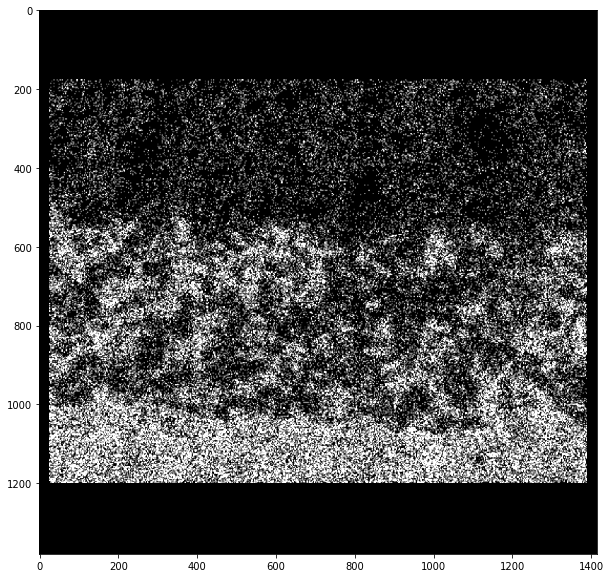

In [6]:
raw = red_imgs[0]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raw,cmap="gray")

In [7]:
if False:
    from scipy.signal import medfilt
    #from scipy.ndimage.filters import percentile_filter
    med1 = medfilt(raw,kernel_size = 9)
    med2 = medfilt(med1,kernel_size = 9)

In [8]:
from scipy.ndimage import uniform_filter
filtered = np.asarray(raw,dtype = np.float)

for repetition in range(30):
    for x in range(filtered.shape[1]):#for each column: filter seperately
        filtered[:,x] = uniform_filter(filtered[:,x],10)

In [9]:
for x in range(20):
    filtered = uniform_filter(filtered,10)   

In [10]:
gradient = filtered.copy()
for x in range(gradient.shape[1]):
    gradient[:,x] =np.gradient(filtered[:,x])

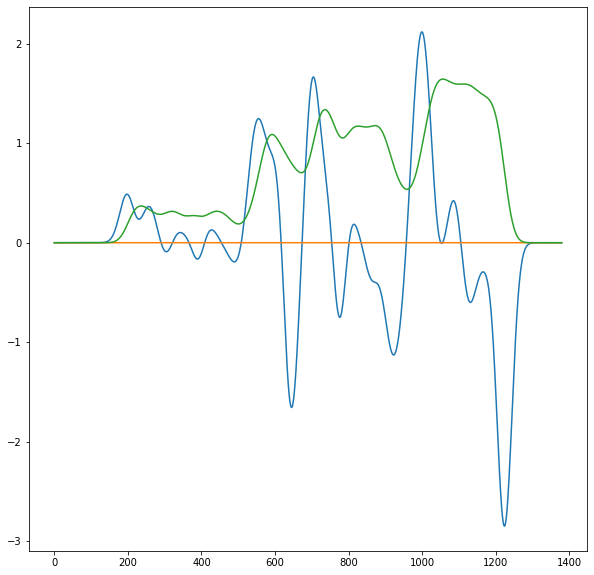

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.gradient(filtered[:,200]))
ax.plot(np.zeros(len(filtered)))

ax.plot(filtered[:,220][:]/100)

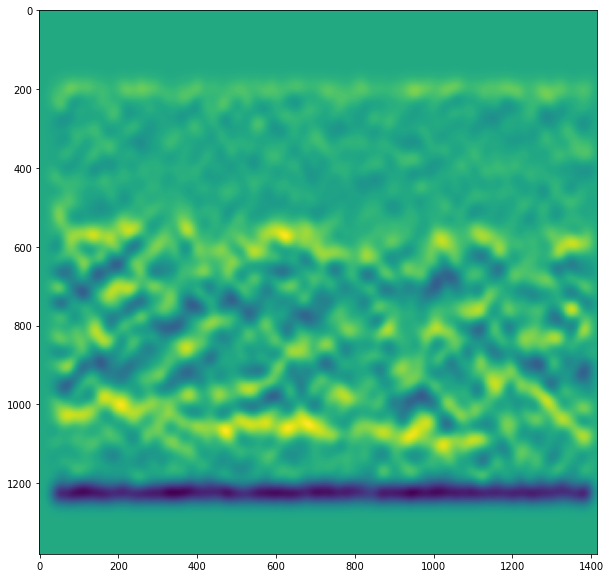

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(gradient)
#ax.imshow(np.abs(gradient)>np.std(gradient))
#ax.imshow(percentile_filter(red_imgs[3],percentile=5,size = 9))

In [13]:
#ax[0].set_title('Hough transform')


In [32]:
low = []
high = []

high_line_thres = .6
low_line_thres = .9

start_bottom = 1100
start_top = 500
for x in range(gradient.shape[1]):
    found = False
    for y in range(start_bottom,0,-1):
        if(np.abs(gradient[y,x])>low_line_thres):
            found = True
            low.append(y)
            break
    if not found:
        low.append(np.nan)
    
    found = False
    for y in range(start_top,gradient.shape[0],1):
        if(np.abs(gradient[y,x])>high_line_thres):
            found = True
            high.append(y)
            break
    if not found:
        high.append(np.nan)

In [33]:
from scipy.ndimage import gaussian_filter

high = gaussian_filter(high,4)
low = gaussian_filter(low,4)

(0, 1380)

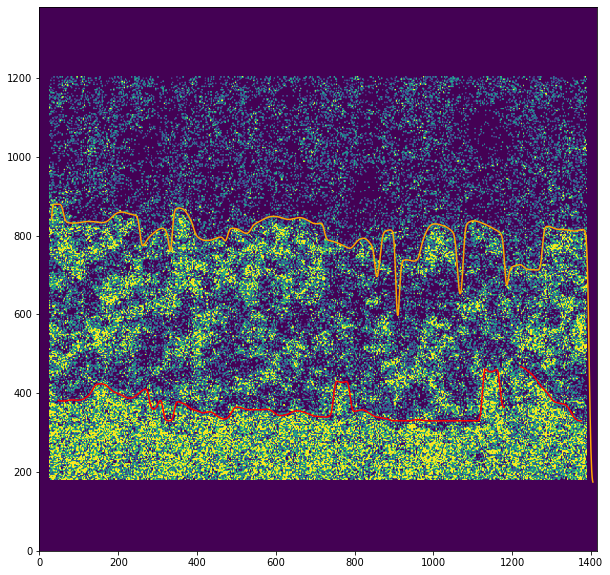

In [35]:
correction2 = 0
correction1 = 50

discard_initial = 10

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raw,extent=[0,gradient.shape[1],0,gradient.shape[0]],
          origin='upper')

#-data+gradient.shape[0] to flip curve and match image
ax.plot(-np.array(high)[discard_initial:]+correction2+gradient.shape[0],color="orange")
ax.plot(-np.array(low)[discard_initial:]+correction1+gradient.shape[0],color="red")

ax.set_ylim(0,gradient.shape[0])

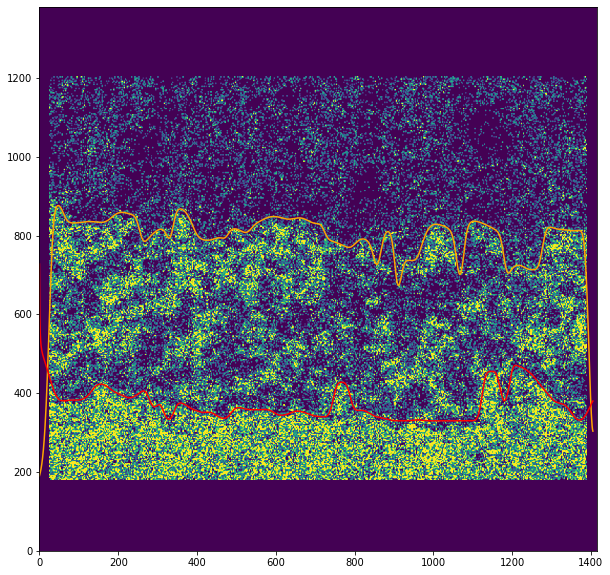

In [36]:
def find_outlines(raw,high_line_thres = .6, low_line_thres = .9, start_bottom = 1100, start_top = 500, 
                  vertcial_smoothing = 30, smoothing = 20, curve_smoothing = 4,
                  correction1 = 50,correction2 = 0, discard_initial = 10):
    filtered = np.asarray(raw,dtype = np.float)

    for repetition in range(vertcial_smoothing):
        for x in range(filtered.shape[1]):#for each column: filter seperately
            filtered[:,x] = uniform_filter(filtered[:,x],10)
    for x in range(smoothing):
        filtered = uniform_filter(filtered,10)   
        
    gradient = filtered.copy()
    for x in range(gradient.shape[1]):
        gradient[:,x] =np.gradient(filtered[:,x])
        
    low = []
    high = []


    for x in range(gradient.shape[1]):
        found = False
        for y in range(start_bottom,0,-1):
            if(np.abs(gradient[y,x])>low_line_thres):
                found = True
                low.append(y)
                break
        if not found:
            low.append(np.nan)

        found = False
        for y in range(start_top,gradient.shape[0],1):
            if(np.abs(gradient[y,x])>high_line_thres):
                found = True
                high.append(y)
                break
        if not found:
            high.append(np.nan)
            
    high = gaussian_filter_nan(high,curve_smoothing)
    low = gaussian_filter_nan(low,curve_smoothing)
    
    high = -np.array(high)[discard_initial:]+correction2+gradient.shape[0]
    low = -np.array(low)[discard_initial:]+correction1+gradient.shape[0]
    
    return high, low

def gaussian_filter_nan(U, sigma):
    U = np.asarray(U)
    
    V=U.copy()
    V[np.isnan(U)]=0
    VV=gaussian_filter(V,sigma=sigma)

    W=0*U.copy()+1
    W[np.isnan(U)]=0
    WW= gaussian_filter(W,sigma=sigma)

    epsilon=0.000001
    Z=VV/(WW+epsilon)  
    return Z


fig, ax = plt.subplots(figsize=(10,10))
high, low = find_outlines(raw, curve_smoothing = 8)
ax.plot(high, color="orange")
ax.plot(low, color = "red")
ax.imshow(raw,extent=[0,gradient.shape[1],0,gradient.shape[0]])

# Electron microcope picture

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
from PIL import Image

In [151]:
#path = "400_100/PS_24K/90 min/18_07_27/PS24700_90_04.tif"
path = "400_100/PS_24K/10 min/18_04_30/AAO_400_100_24700_10_02.tif"

im = np.asarray(Image.open(path))



In [152]:
im = np.asarray(im[:650],dtype = np.float)

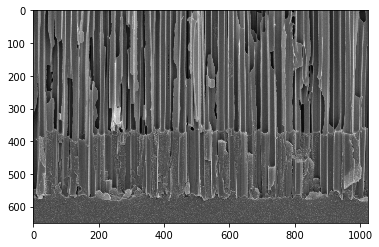

In [153]:
plt.imshow(im, cmap="gray")

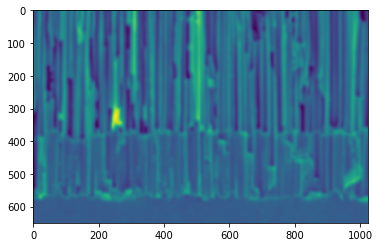

In [154]:
plt.imshow(gaussian_filter(im,5))

In [155]:
horizontal_component = np.asarray(np.gradient(gaussian_filter(im,1))[0],dtype=np.float)
horizontal_component = horizontal_component+np.abs(np.min(horizontal_component))
horizontal_component /= np.std(horizontal_component)

Text(0.5, 1.0, 'Sampled points')

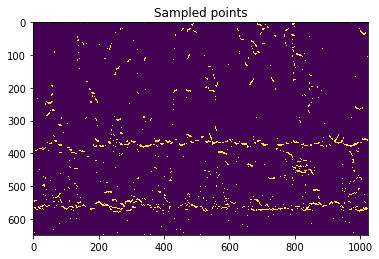

In [156]:
fig, ax = plt.subplots(1)
ax.imshow(horizontal_component>15)
ax.set_title('Sampled points')

In [157]:
kernel = np.ones((3,6),np.uint8)

img = np.asarray(horizontal_component>15*np.std(horizontal_component),dtype=np.float)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

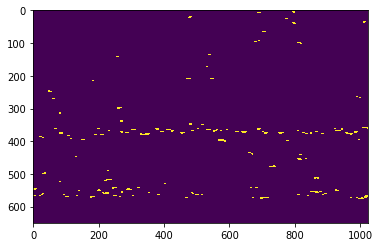

In [158]:
plt.imshow(opening)

In [122]:
opening = np.asarray(opening,dtype=np.bool)

In [123]:
coords = np.where(opening)

In [124]:
mask = np.logical_and(coords[0]<400, coords[0]>350)
coords_lower = np.asarray([coords[0][mask],coords[1][mask]])

In [125]:
np.max(coords_lower[1])

1023

In [126]:
def flip_ud(y,image_height):
    return -y+ image_height


/home/eler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


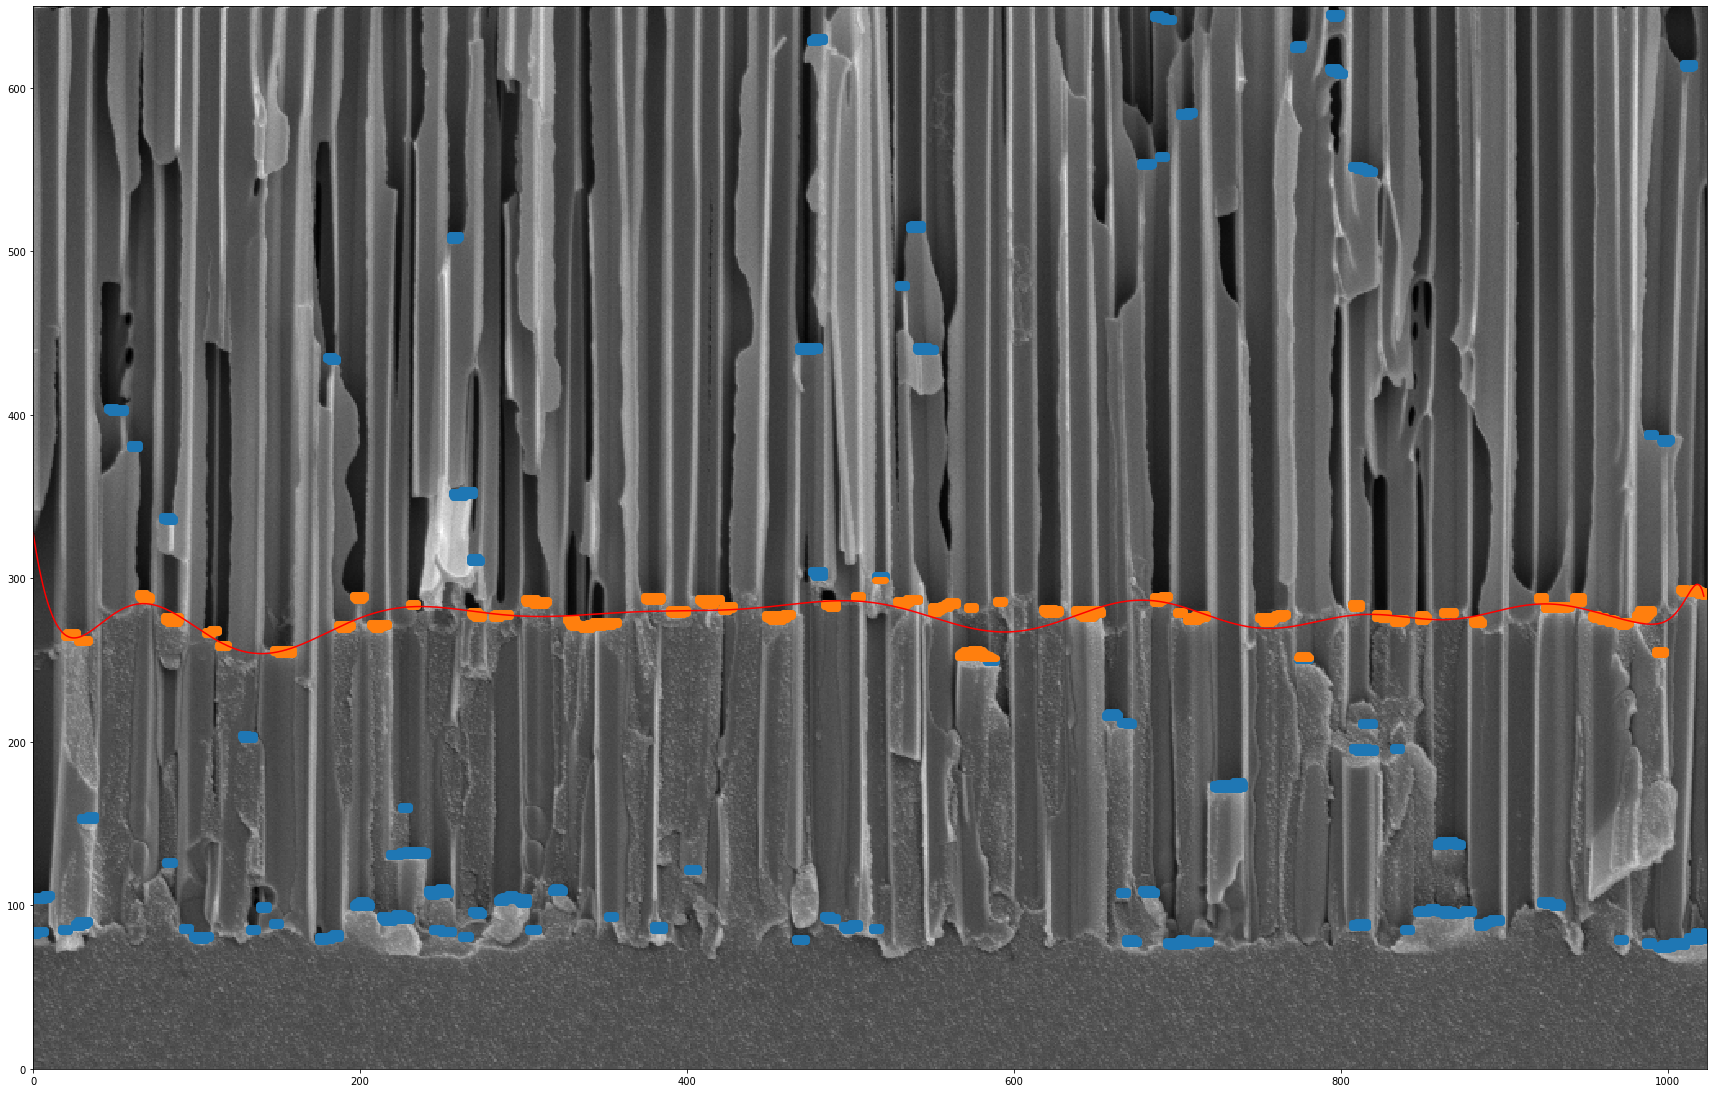

In [127]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(coords[1],flip_ud(coords[0],image_height = img.shape[0]))
ax.scatter(coords_lower[1],flip_ud(coords_lower[0],image_height=img.shape[0]))


f = np.poly1d(np.polyfit(coords_lower[1],coords_lower[0],100))
x = np.arange(np.max(coords_lower[1]))

y = f(x)

ax.plot(x,flip_ud(y, image_height=im.shape[0]), color ="red")

ax.imshow(im,extent=[0,im.shape[1],0,im.shape[0]],cmap ="gray")

In [ ]:
plt.imshow(horizontal_component**2, cmap="gray")

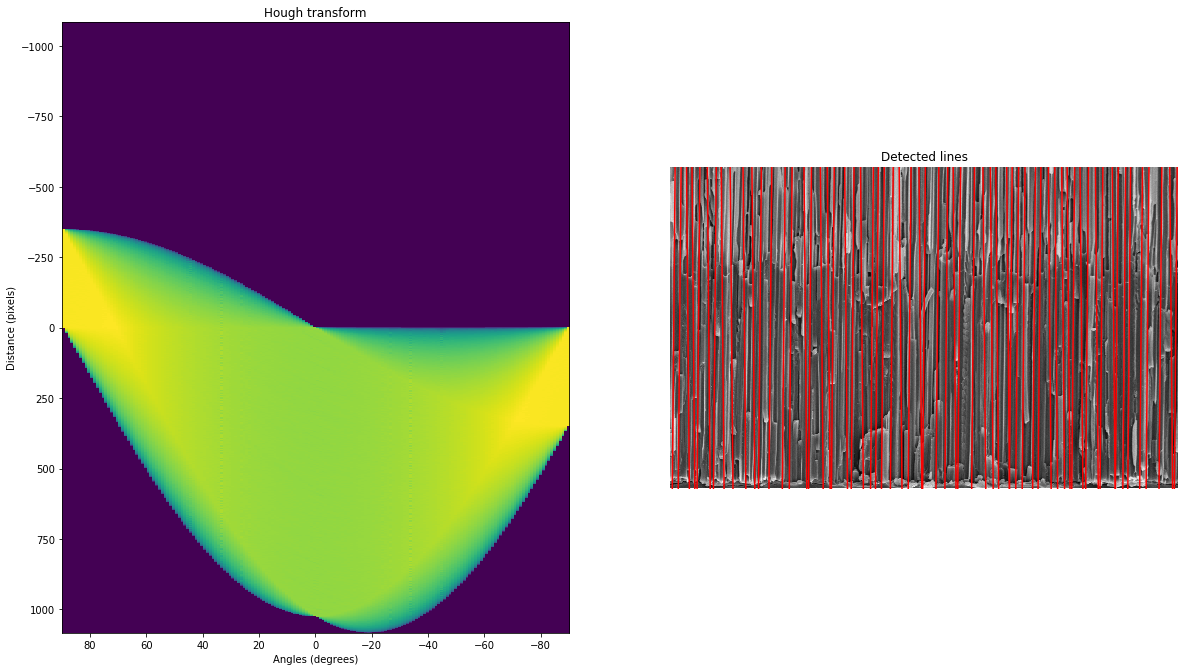

In [108]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm



if False:
    image = im[-200:350,:]#Use only uniform part of image to fit hough lines
if True:
    image = im[:350,:]
image = np.gradient(image)[1]#Vertical component of gradient

h, theta, d = hough_line(image)#hough transform

#Generate pLots

hough_map = np.log(1 + h) #log scale for better visibility

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(hough_map, extent=[90,-90, d[-1], d[0]], aspect=0.1)
ax[0].set_title('Hough transform')
ax[0].set_xlabel('Angles (degrees)')
ax[0].set_ylabel('Distance (pixels)')


maskout = 1
h[:,:90-maskout] = 0
h[:,90+maskout:] = 0


image = im#PLot lines in front of original image
ax[1].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')
plt.show()


In [100]:
from scipy import fftpack
from matplotlib.colors import LogNorm

im_fft = fftpack.fft2(im)

In [ ]:
plt.imshow(np.abs(im_fft),norm=LogNorm(vmin=5))

In [ ]:
a = [[np.sin(x) for x in np.linspace(0,50,50)] for a in range(50)]


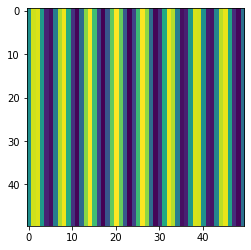

In [236]:
plt.imshow(a)

In [240]:
from scipy.ndimage import rotate
a = rotate(a,90)


In [230]:
a = a[20:-20,20:-20]


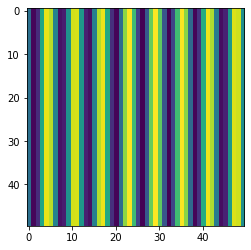

In [241]:
plt.imshow(a)

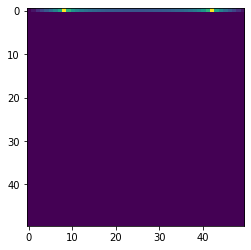

In [242]:
plt.imshow(np.abs(np.fft.fft2(a)),norm=LogNorm(vmin=5))